Voici les CIP des membres de l'équipe

- Karl Plourde - PLOK2502

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap

c:\Users\plok2502\Documents\GitHub\IFT799\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_df = pd.read_csv('data/data.csv')
labels_df = pd.read_csv('data/labels.csv')

In [3]:
both_df = pd.merge(labels_df, data_df, on='Unnamed: 0', how='left')
both_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
both_df.set_index('id', inplace=True)
both_df.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
id,,,,,,,,,,,,,,,,,,,,,
sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


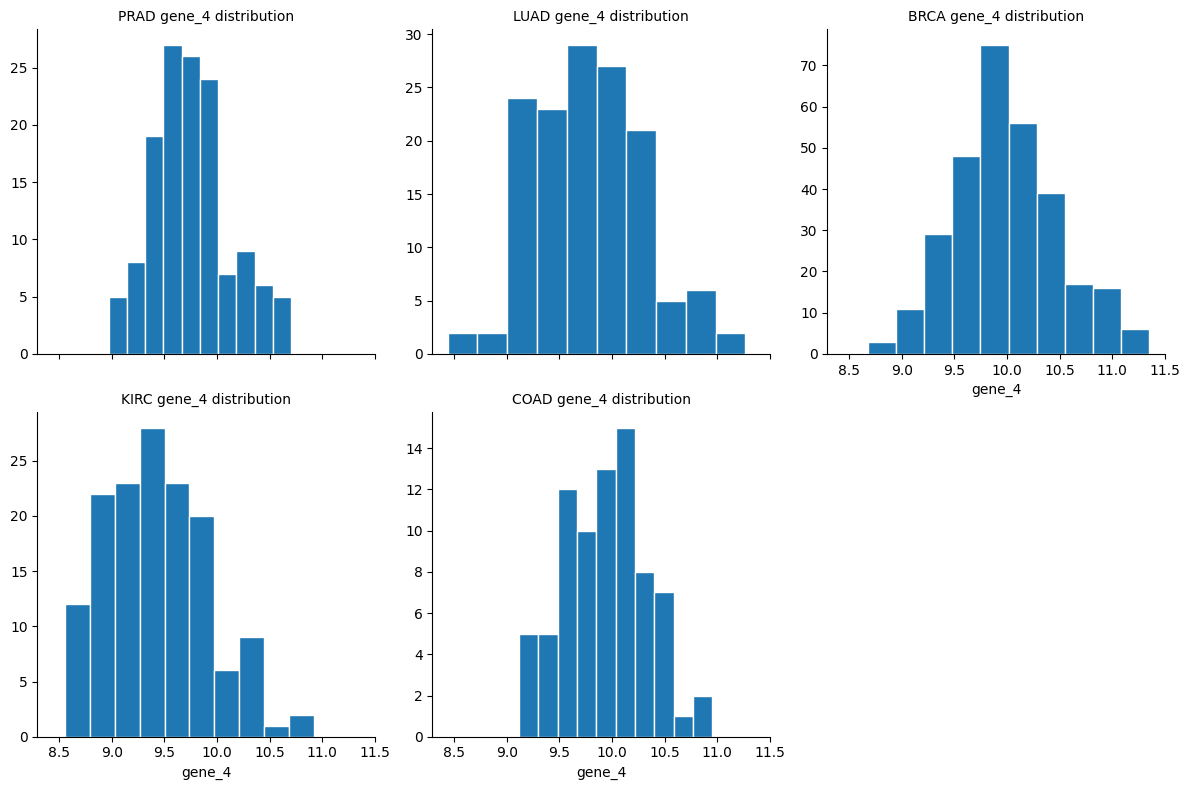

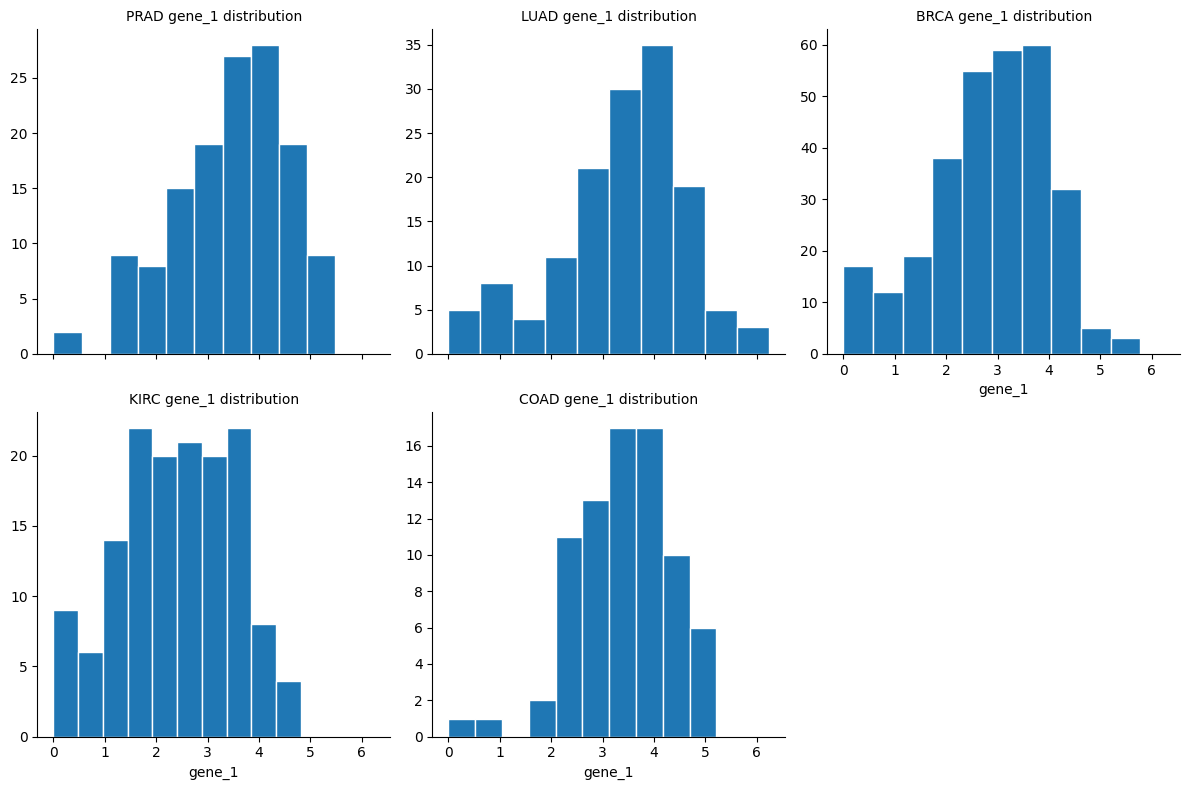

In [4]:
#2a

g1 = sns.FacetGrid(both_df, col="Class", col_wrap=3, height=4, sharey=False)
g1.map(plt.hist, 'gene_4', edgecolor="w").set_titles("{col_name} gene_4 distribution")
plt.show()

g2 = sns.FacetGrid(both_df, col="Class", col_wrap=3, height=4, sharey=False)
g2.map(plt.hist, 'gene_1', edgecolor="w").set_titles("{col_name} gene_1 distribution")
plt.show()

<Axes: xlabel='gene_4', ylabel='gene_1'>

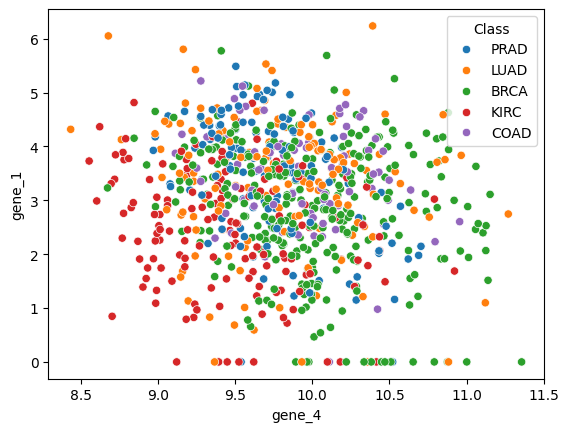

In [5]:
#2b
# a modif par kirc prad,etc
sns.scatterplot(data=both_df, x="gene_4", y="gene_1", hue="Class")

(-0.3, 0.5314157364617672)

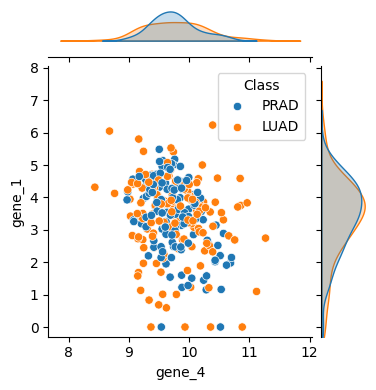

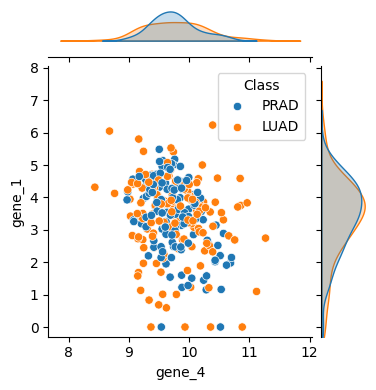

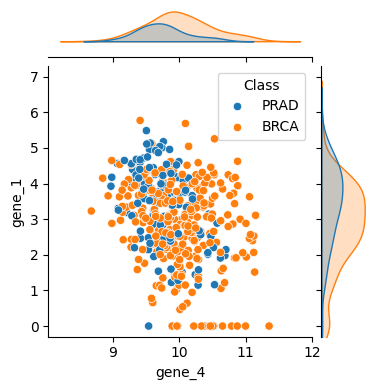

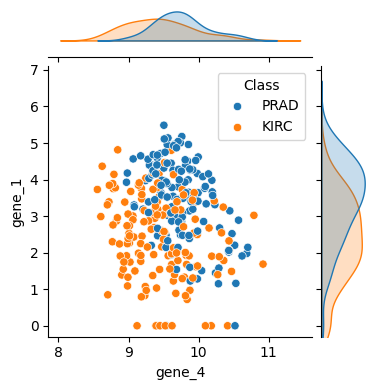

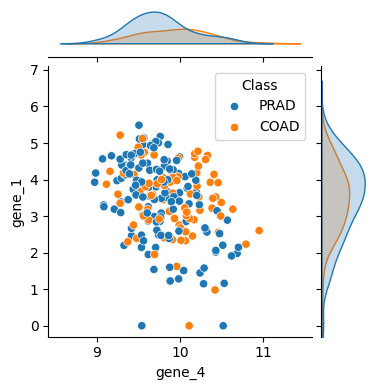

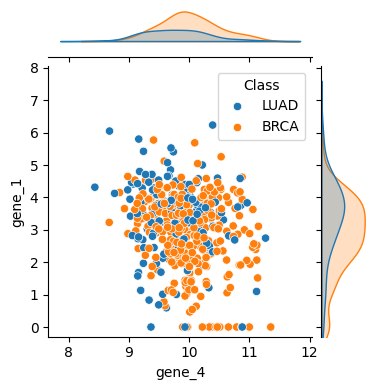

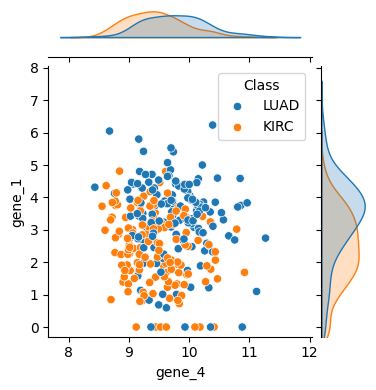

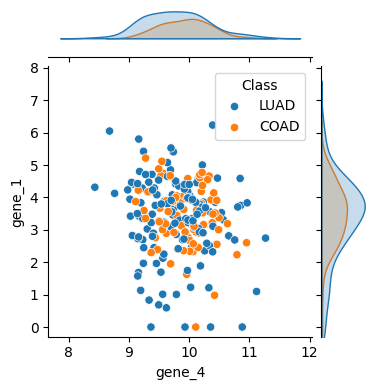

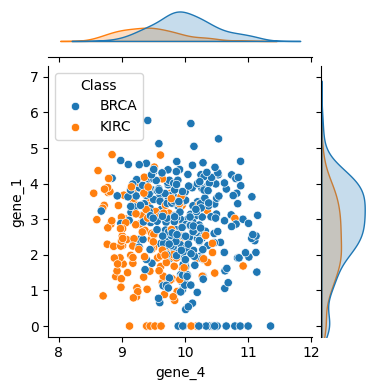

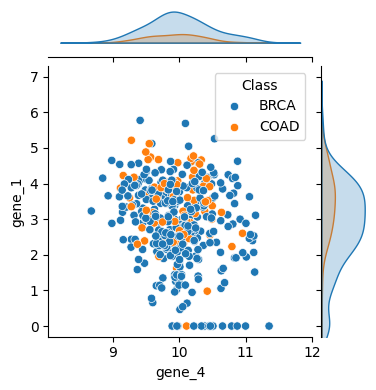

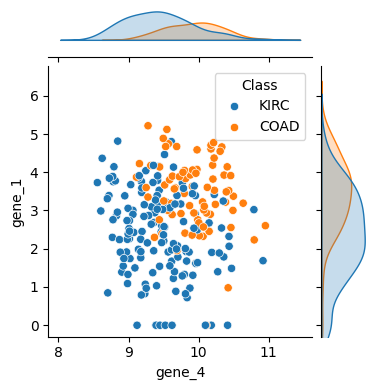

In [6]:
#2c

# Define a common height for all jointplots
plot_height = 4

#Jointplot of gene_1 and gene_4 for Class PRAD and LUAD
prad_luad_joint = sns.jointplot(data=both_df[both_df['Class'].isin(['PRAD', 'LUAD'])], x="gene_4", y="gene_1", hue="Class", height=plot_height)
prad_luad_joint.ax_joint.set_ylim(bottom=-0.3)
prad_luad_joint.ax_marg_x.set_ylim(bottom=-0.3)

#Jointplot of gene_1 and gene_4 for Class PRAD and LUAD
prad_luad_joint = sns.jointplot(data=both_df[both_df['Class'].isin(['PRAD', 'LUAD'])], x="gene_4", y="gene_1", hue="Class", height=plot_height)
prad_luad_joint.ax_joint.set_ylim(bottom=-0.3)
prad_luad_joint.ax_marg_x.set_ylim(bottom=-0.3)

#Jointplot of gene_1 and gene_4 for Class PRAD and BRCA
prad_brca_joint = sns.jointplot(data=both_df[both_df['Class'].isin(['PRAD', 'BRCA'])], x="gene_4", y="gene_1", hue="Class", height=plot_height)
prad_brca_joint.ax_joint.set_ylim(bottom=-0.3)
prad_brca_joint.ax_marg_x.set_ylim(bottom=-0.3)

#Jointplot of gene_1 and gene_4 for Class PRAD and KIRC
prad_kirc_joint = sns.jointplot(data=both_df[both_df['Class'].isin(['PRAD', 'KIRC'])], x="gene_4", y="gene_1", hue="Class", height=plot_height)
prad_kirc_joint.ax_joint.set_ylim(bottom=-0.3)
prad_kirc_joint.ax_marg_x.set_ylim(bottom=-0.3)

#Jointplot of gene_1 and gene_4 for Class PRAD and COAD
prad_coad_joint = sns.jointplot(data=both_df[both_df['Class'].isin(['PRAD', 'COAD'])], x="gene_4", y="gene_1", hue="Class", height=plot_height)
prad_coad_joint.ax_joint.set_ylim(bottom=-0.3)
prad_coad_joint.ax_marg_x.set_ylim(bottom=-0.3)

#Jointplot of gene_1 and gene_4 for Class LUAD and BRCA
luad_brca_joint = sns.jointplot(data=both_df[both_df['Class'].isin(['LUAD', 'BRCA'])], x="gene_4", y="gene_1", hue="Class", height=plot_height)
luad_brca_joint.ax_joint.set_ylim(bottom=-0.3)
luad_brca_joint.ax_marg_x.set_ylim(bottom=-0.3)

#Jointplot of gene_1 and gene_4 for Class LUAD and KIRC
luad_kirc_joint = sns.jointplot(data=both_df[both_df['Class'].isin(['LUAD', 'KIRC'])], x="gene_4", y="gene_1", hue="Class", height=plot_height)
luad_kirc_joint.ax_joint.set_ylim(bottom=-0.3)
luad_kirc_joint.ax_marg_x.set_ylim(bottom=-0.3)

#Jointplot of gene_1 and gene_4 for Class LUAD and COAD
luad_coad_joint = sns.jointplot(data=both_df[both_df['Class'].isin(['LUAD', 'COAD'])], x="gene_4", y="gene_1", hue="Class", height=plot_height)
luad_coad_joint.ax_joint.set_ylim(bottom=-0.3)
luad_coad_joint.ax_marg_x.set_ylim(bottom=-0.3)

#Jointplot of gene_1 and gene_4 for Class BRCA and KIRC
brca_kirc_joint = sns.jointplot(data=both_df[both_df['Class'].isin(['BRCA', 'KIRC'])], x="gene_4", y="gene_1", hue="Class", height=plot_height)
brca_kirc_joint.ax_joint.set_ylim(bottom=-0.3)
brca_kirc_joint.ax_marg_x.set_ylim(bottom=-0.3)

#Jointplot of gene_1 and gene_4 for Class BRCA and COAD
brca_coad_joint = sns.jointplot(data=both_df[both_df['Class'].isin(['BRCA', 'COAD'])], x="gene_4", y="gene_1", hue="Class", height=plot_height)
brca_coad_joint.ax_joint.set_ylim(bottom=-0.3)
brca_coad_joint.ax_marg_x.set_ylim(bottom=-0.3)

#Jointplot of gene_1 and gene_4 for Class KIRC and COAD
kirc_coad_joint = sns.jointplot(data=both_df[both_df['Class'].isin(['KIRC', 'COAD'])], x="gene_4", y="gene_1", hue="Class", height=plot_height)
kirc_coad_joint.ax_joint.set_ylim(bottom=-0.3)
kirc_coad_joint.ax_marg_x.set_ylim(bottom=-0.3)


In [7]:
both_df['Class'].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [8]:
both_df.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
id,,,,,,,,,,,,,,,,,,,,,
sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [9]:
features = both_df.drop('Class', axis=1)
features.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
id,,,,,,,,,,,,,,,,,,,,,
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


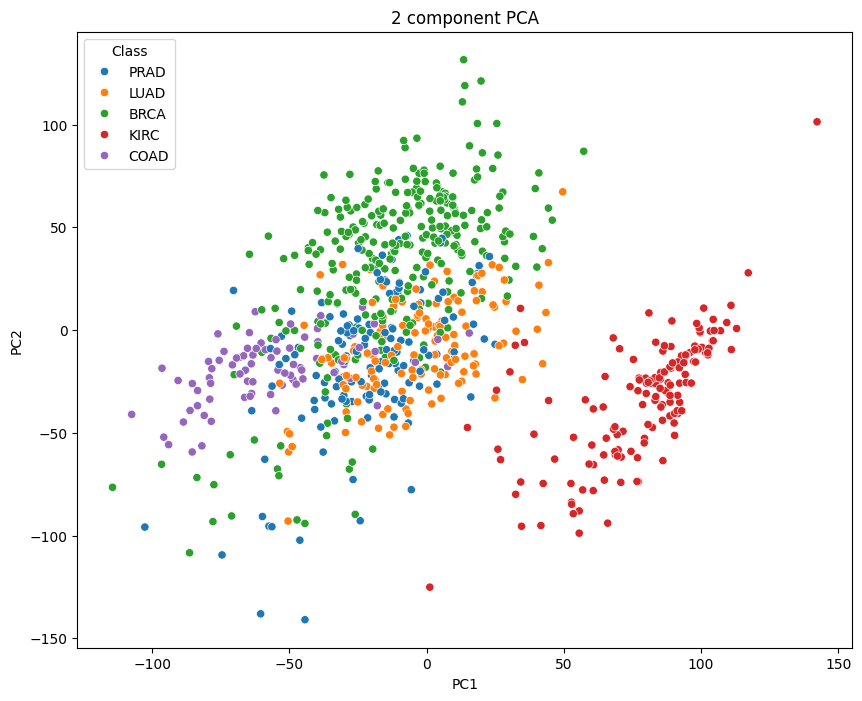

In [10]:
#

features = both_df.drop('Class', axis=1)
features_scaled = StandardScaler().fit_transform(features)
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Class'] = both_df['Class'].reset_index(drop=True)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class')
plt.title("2 component PCA")
plt.show()

In [13]:
pca_df.head()

,PC1,PC2,Class
0,-57.446987,-95.410981,PRAD
1,-16.919430,-0.732470,LUAD
2,-70.345218,19.303327,PRAD
3,-49.161591,9.227586,PRAD
4,-18.132534,51.327797,BRCA


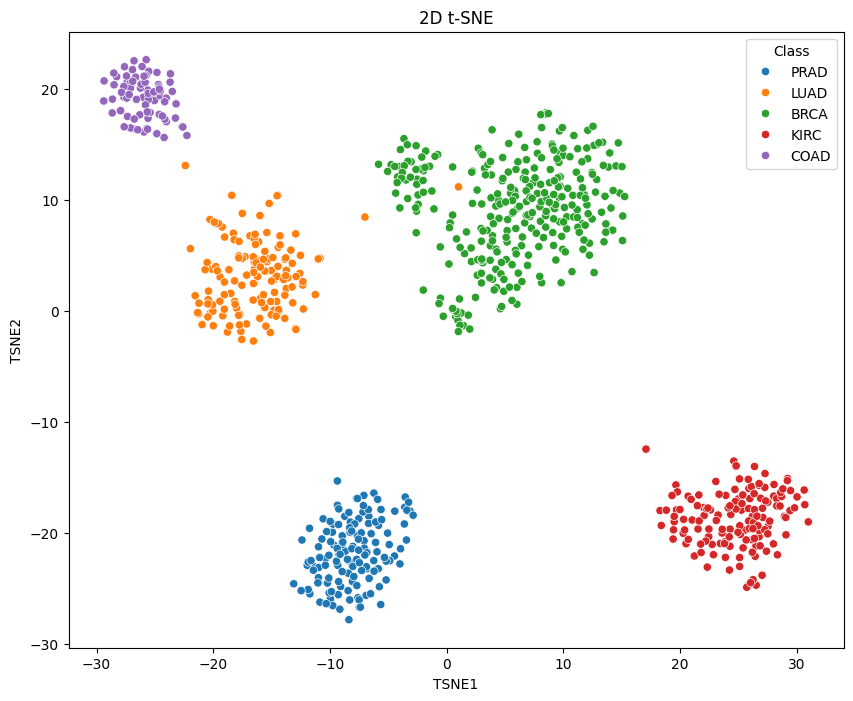

In [11]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_scaled)
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = both_df['Class'].reset_index(drop=True)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class')
plt.title("2D t-SNE")
plt.show()

c:\Users\plok2502\Documents\GitHub\IFT799\.venv\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


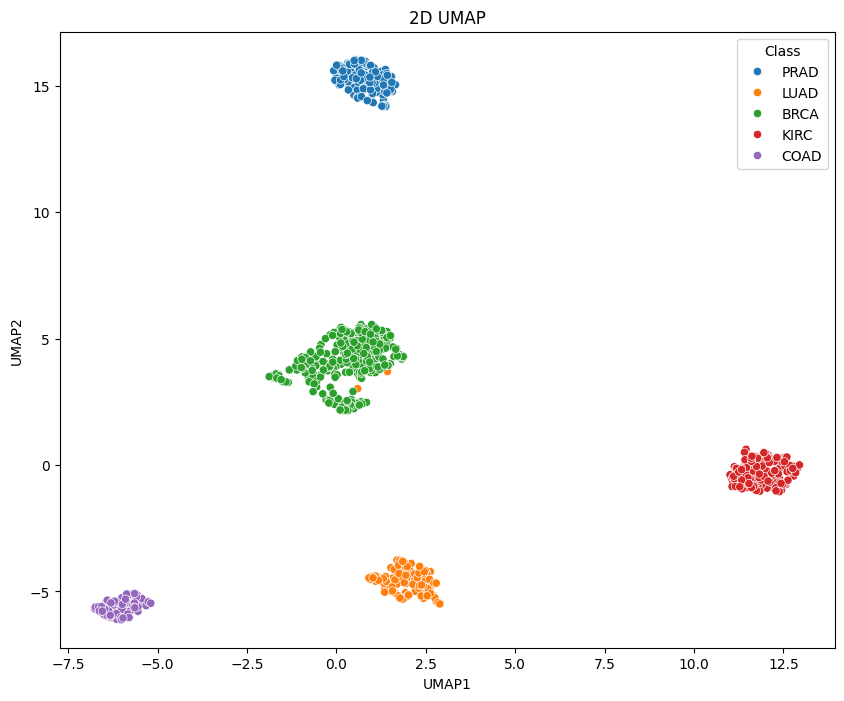

In [12]:
reducer = umap.UMAP(random_state=42)
umap_results = reducer.fit_transform(features_scaled)
umap_df = pd.DataFrame(data=umap_results, columns=['UMAP1', 'UMAP2'])
umap_df['Class'] = both_df['Class'].reset_index(drop=True)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Class')
plt.title("2D UMAP")
plt.show()